In [24]:
import AutoOD as aod
import importlib


import numpy as np
import CLAMS as clams
from tqdm import tqdm
import json
import matplotlib.pyplot as plt

importlib.reload(aod)
importlib.reload(clams)



<module 'CLAMS' from '/home/hj/cluster-ambiguity/src/clams/CLAMS.py'>

In [29]:
contamination_arr = np.linspace(0.05, 0.5, 20)
identifier = "npz"
data_name = "mnist"

iteraion = 5


lof_nn_results = {
	10: [],
	20: [],
	30: [],
	40: [],
	50: []
}

zipfile = np.load(f"./data_sampling/{data_name}.{identifier}", allow_pickle=True)
data, labels = zipfile["positions"], zipfile["labels"]


for contamination in contamination_arr:
	print("running contamination", contamination)
	for nn in tqdm(lof_nn_results.keys()):
		prediction = aod.local_outlier_factor(data, nn, contamination)
		data_wo_outliers = data[prediction == 1]
		score_sum = 0
		iter_num = 0
		for i in range(iteraion):
			try:
				ca = clams.ClusterAmbiguity(verbose=0, random_state=i, S=i * 0.5)
				amb_score = ca.fit(data_wo_outliers)
				score_sum += amb_score
				iter_num += 1
			except:
				pass
		lof_nn_results[nn].append(score_sum / iter_num)


running contamination 0.05


100%|██████████| 5/5 [1:13:22<00:00, 880.42s/it]


running contamination 0.0736842105263158


100%|██████████| 5/5 [1:09:11<00:00, 830.27s/it]


running contamination 0.09736842105263158


100%|██████████| 5/5 [1:10:16<00:00, 843.20s/it]


running contamination 0.12105263157894737


100%|██████████| 5/5 [1:09:41<00:00, 836.22s/it]


running contamination 0.14473684210526316


100%|██████████| 5/5 [1:03:36<00:00, 763.29s/it]


running contamination 0.16842105263157897


100%|██████████| 5/5 [1:01:42<00:00, 740.60s/it]


running contamination 0.19210526315789472


100%|██████████| 5/5 [1:00:26<00:00, 725.38s/it]


running contamination 0.21578947368421053


100%|██████████| 5/5 [59:23<00:00, 712.66s/it]


running contamination 0.23947368421052634


100%|██████████| 5/5 [58:13<00:00, 698.78s/it]


running contamination 0.2631578947368421


 20%|██        | 1/5 [11:15<45:03, 675.88s/it]

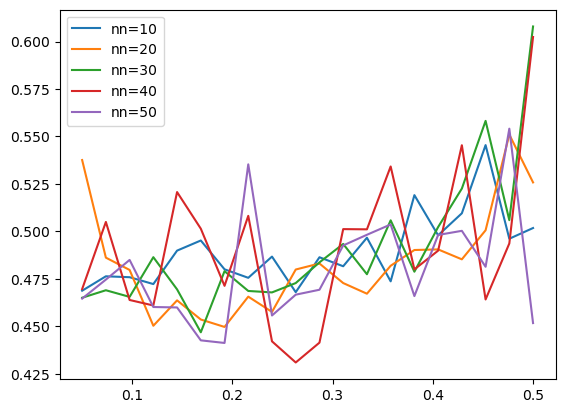

In [28]:
results = {
	"results": lof_nn_results,
	"contamination": contamination_arr.tolist()
}

with open(f"./od_benchmark/results/lof_nn_{data_name}.json", "w") as f:
	json.dump(results, f)

## plot the results
for key in lof_nn_results.keys():
	plt.plot(contamination_arr, lof_nn_results[key], label=f"nn={key}")

plt.legend()